In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
#Exploratory data analysis 

In [210]:
df = pd.read_csv("Data/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [211]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [212]:
df.isnull().sum() # To count number of null values in each columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

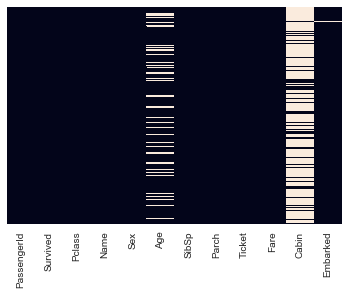

In [213]:
# To display null values in all columns, Yellow colour in heat map dipicts null in that particular column
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [214]:
df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


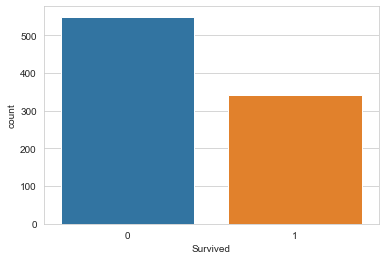

In [215]:
# To display survived count
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df)

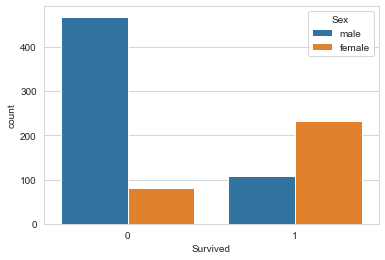

In [216]:
sns.countplot(x='Survived',hue='Sex', data=df)

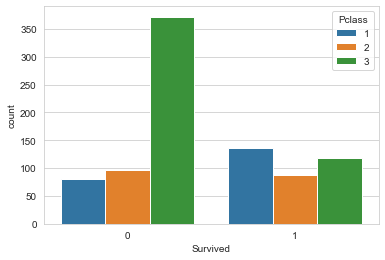

In [217]:
sns.countplot(x='Survived',hue='Pclass', data=df)

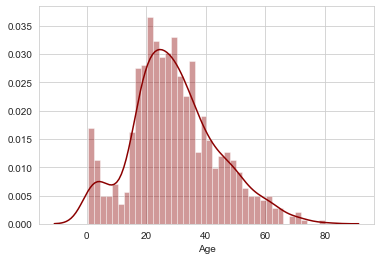

In [218]:
sns.distplot(df['Age'].dropna(), color='darkred', bins=40)

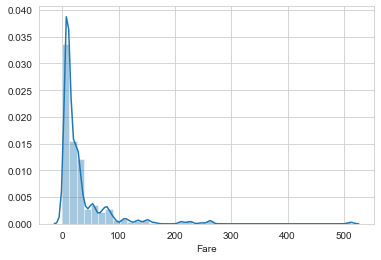

In [219]:
sns.distplot(df['Fare'].dropna(), bins=40)

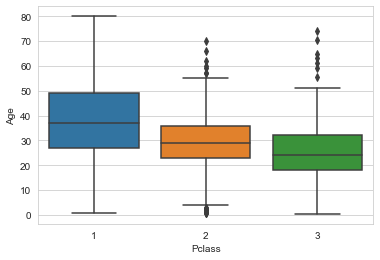

In [220]:
# Smatter way to identify age group in per class 
sns.boxplot(x='Pclass', y='Age', data=df)

In [221]:
age_mean_for_1 = df[df.Pclass==1].Age.mean()
age_mean_for_2 = df[df.Pclass==2].Age.mean()
age_mean_for_3 = df[df.Pclass==3].Age.mean()

In [222]:
age_mean_for_3

25.14061971830986

In [223]:
def impute_age(pclass):
    if pclass==1:
        return age_mean_for_1
    if pclass==2:
        return age_mean_for_2
    if pclass==3:
        return age_mean_for_3

def gender_mapping(gender):
    if gender=='male':
        return 1
    if gender=='female':
        return 2

In [224]:
df['Age'] = df['Pclass'].apply(impute_age)

In [225]:
df['Sex'] = df['Sex'].apply(gender_mapping)

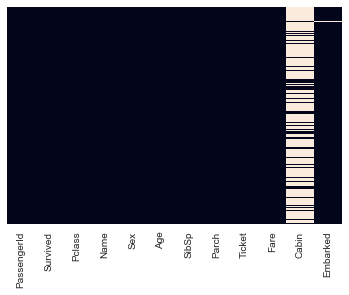

In [226]:
# To display null values in all columns, Yellow colour in heat map dipicts null in that particular column
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [227]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

In [228]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,25.140620,7.2500
1,1,1,2,38.233441,71.2833
2,1,3,2,25.140620,7.9250
3,1,1,2,38.233441,53.1000
4,0,3,1,25.140620,8.0500
...,...,...,...,...,...
886,0,2,1,29.877630,13.0000
887,1,1,2,38.233441,30.0000
888,0,3,2,25.140620,23.4500
889,1,1,1,38.233441,30.0000


In [229]:
X = df.drop('Survived', axis=1)

In [230]:
X

,Pclass,Sex,Age,Fare
0,3,1,25.140620,7.2500
1,1,2,38.233441,71.2833
2,3,2,25.140620,7.9250
3,1,2,38.233441,53.1000
4,3,1,25.140620,8.0500
...,...,...,...,...
886,2,1,29.877630,13.0000
887,1,2,38.233441,30.0000
888,3,2,25.140620,23.4500
889,1,1,38.233441,30.0000


In [231]:
Y = df['Survived']

In [232]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [235]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [236]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [237]:
model.score(x_test, y_test)

0.8435754189944135

In [240]:
prediction = model.predict(x_test)

In [243]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [244]:
c_metrics = confusion_matrix(y_test, prediction)

In [245]:
accuracy

array([[101,  15],
       [ 13,  50]])

In [246]:
accuracy = accuracy_score(y_test, prediction)

In [247]:
accuracy

0.8435754189944135